In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Canonical Density Matrix of the Harmonic Oscillator

In [3]:
angfreq = 6.546*10**(12)
hbar = 6.62607004*10**(-34)/(2*np.pi)
mass = 1.6726*10**(27)
k_B = 1.38064852*10**(-23)

In [4]:
def energy(n):
    return (n+1/2)*hbar*angfreq

In [5]:
def density_matrix(T):
    Z = 0
    for k in list(range(50)):
        Z = Z + np.exp(-energy(k)/(k_B*T))
    matrix = np.zeros((50,50))
    for i in list(range(50)):
        matrix[i,i] = matrix[i,i] + 1/Z * np.exp(-energy(i)/(k_B*T))
    return matrix

In [6]:
g = 0
for j in range(50):
    g = g + density_matrix(300)[j,j]
print(g)

1.0


In [7]:
print(density_matrix(300))

[[1.53554867e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.29981438e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.10026953e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.08552191e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.15128502e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.36047027e-05]]


In [8]:
def boltzmann(T):
    fig = plt.figure(figsize =(13 ,9))
    ax = fig.add_subplot(1,1,1)
    
    x = list(range(50))
    y = density_matrix(T)[x,x]
    ax.scatter(x, y, s=15, alpha=1.0)


    ax.set_title(r'$\mathrm{Boltzmann\;Distribution}$', fontsize=25)
    ax.set_xlabel(r'$\mathrm{Quantum}\;\mathrm{States}$', fontsize=23)
    ax.set_ylabel(r'$\mathrm{Probability}$', fontsize=23)

    plt.show()

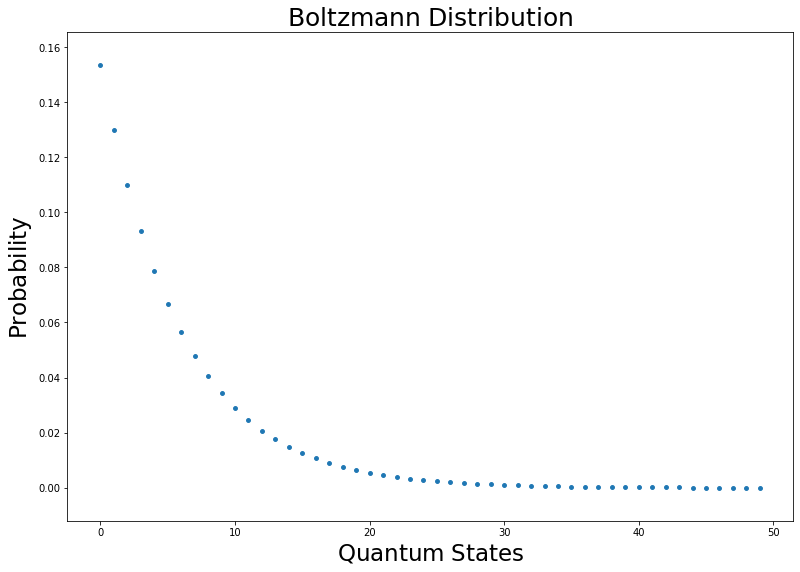

None


In [9]:
print(boltzmann(300))

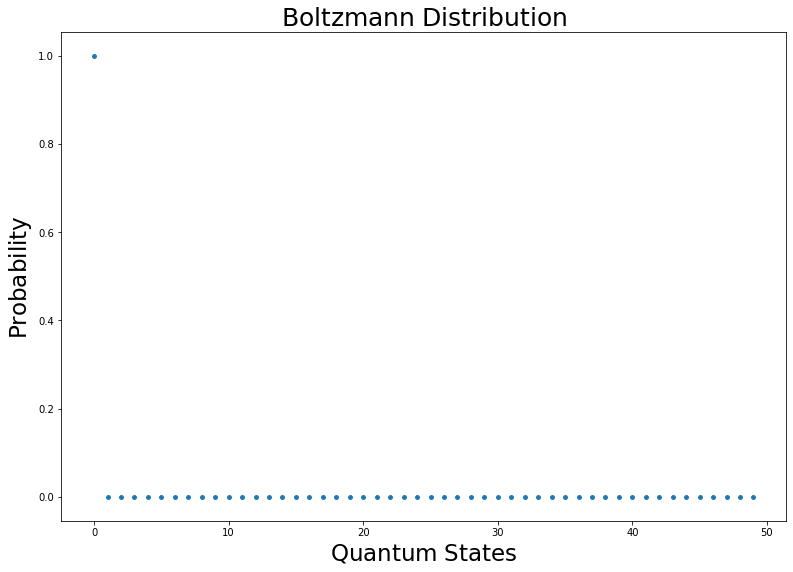

None


In [10]:
print(boltzmann(0.1))

## Average Internal Energy and Classical Limit

In [59]:
def total_energy():
    matrix1 = np.zeros((50,50))
    for i in list(range(50)):
        matrix1[i,i] = matrix1[i,i] + (i+1/2)*angfreq*hbar
    return matrix1

In [60]:
print(total_energy())

[[3.45161350e-22 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.03548405e-21 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.72580675e-21 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.27903283e-20
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.34806510e-20 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.41709737e-20]]


In [61]:
def internal_energy():
    vec = []
    for T in [1+h for h in list(range(300))]:
        f = 0
        matrix2 = np.matmul(density_matrix(T),total_energy())
        for i in list(range(len(matrix2))):
            f = f + matrix2[i,i]
        vec.append(f)
    return vec

In [62]:
print(internal_energy())

[3.4516135018553157e-22, 3.4516135019511927e-22, 3.4516139007214534e-22, 3.451639228610538e-22, 3.4519269291870873e-22, 3.4532732571186413e-22, 3.4570748412684426e-22, 3.4649658295736035e-22, 3.478404735192899e-22, 3.4984431441779874e-22, 3.5256806573443833e-22, 3.560326618302994e-22, 3.602298642621935e-22, 3.651318739348451e-22, 3.70699145052059e-22, 3.768861262120346e-22, 3.836451934958088e-22, 3.909291884714055e-22, 3.986929529058409e-22, 4.0689417566706445e-22, 4.154937858231033e-22, 4.244560571782399e-22, 4.337485370797822e-22, 4.433418745633735e-22, 4.532095966183528e-22, 4.633278634884593e-22, 4.73675221998375e-22, 4.842323680617479e-22, 4.9498192445948425e-22, 5.059082367597855e-22, 5.1699718825673475e-22, 5.28236033609478e-22, 5.3961325018665195e-22, 5.511184057732874e-22, 5.627420411564168e-22, 5.744755660902855e-22, 5.86311167199972e-22, 5.982417264798213e-22, 6.102607491591397e-22, 6.223622998290404e-22, 6.345409458433643e-22, 6.467917071188113e-22, 6.591100115626688e-22, 6

In [63]:
def internal_energy_2(T):
    f = 0
    matrix2 = np.matmul(density_matrix(T),total_energy())
    for i in list(range(len(matrix2))):
        f = f + matrix2[i,i]
    return f

In [64]:
print(internal_energy_2(50))

7.469145179340685e-22


In [65]:
len(internal_energy())

300

In [66]:
def equipartition_energy():
    vec = []
    for T in [1+h for h in list(range(300))]:
        f = k_B*T
        vec.append(f)
    return vec

In [67]:
def energy_plot():
    fig = plt.figure(figsize =(13 ,9))
    ax = fig.add_subplot(1,1,1)
    
    x = np.linspace(1, 300, 300)
    y1 = internal_energy()
    y2 = equipartition_energy()
    ax.plot(x,y1,y2)
    
    ax.set_xlabel(r'$\mathrm{Temperature}$', fontsize=23)
    ax.set_ylabel(r'$\mathrm{Internal}\;\mathrm{Energy}$', fontsize=23)
    
    plt.show()

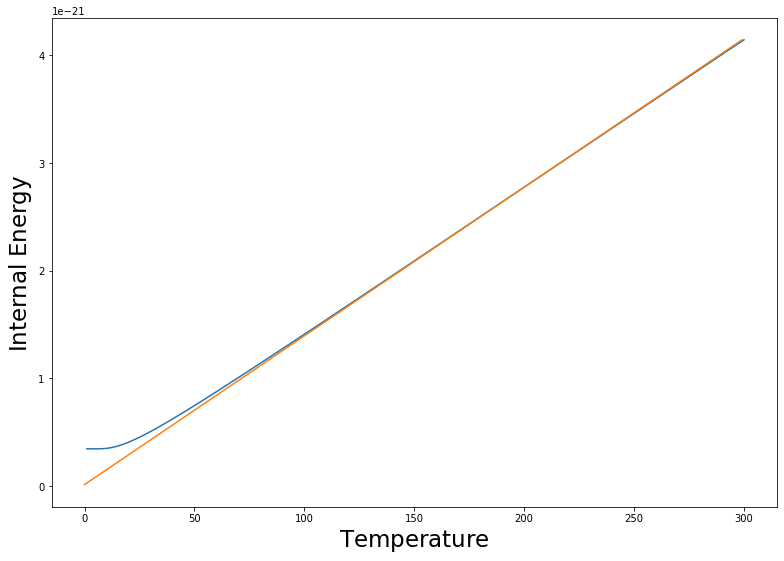

None


In [68]:
print(energy_plot())

## Canonical Density Matrix of a Hydrogen Molecule

In [73]:
angfreq = 6.546*10**(14)
hbar = 6.62607004*10**(-34)/(2*np.pi)
mass = 1.6726*10**(27)
mass_red = mass*mass/(mass+mass)
k_B = 1.38064852*10**(-23)
bond_length = 1.06*10**(-10)
inertia = mass_red*bond_length**2

In [79]:
def energy2(n,j):
    return hbar*angfreq*(n+1/2)+hbar**2*j*(j+1)/(2*inertia)

In [83]:
def density(T):
    Z = 0
    for n2 in list(range(3)):
        for j2 in list(range(50)):
            Z = Z + np.exp(-energy2(n2, j2)/(k_B*T))
    matrix = np.zeros((150, 150))
    for n3 in list(range(3)):
        for j3 in list(range(50)):
            matrix[n3+j3, n3+j3] = matrix[n3+j3, n3+j3] + 1/Z * np.exp(-energy2(n3, j3)/(k_B*T))
    return matrix

In [90]:
def energy_array():
    vec = []
    for n4 in list(range(3)):
        for j4 in list(range(50)):
            f = hbar*angfreq*(n4+1/2)+hbar**2*j4*(j4+1)/(2*inertia)
            vec.append(f)
    return vec

In [93]:
print(energy_array())

[3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.451613501855316e-20, 3.45161350

In [94]:
def boltzmann2(T):
    fig = plt.figure(figsize =(13 ,9))
    ax = fig.add_subplot(1,1,1)
    
    lin = list(range(150))
    
    x = energy_array()
    y = density(T)[lin,lin]
    ax.scatter(x, y, s=15, alpha=1.0)
    
    ax.set_xlim(3.451613501855316e-20, 1.725806750927658e-19)

    ax.set_title(r'$\mathrm{Boltzmann\;Distribution}$', fontsize=25)
    ax.set_xlabel(r'$\mathrm{Quantum}\;\mathrm{States}$', fontsize=23)
    ax.set_ylabel(r'$\mathrm{Probability}$', fontsize=23)

    plt.show()

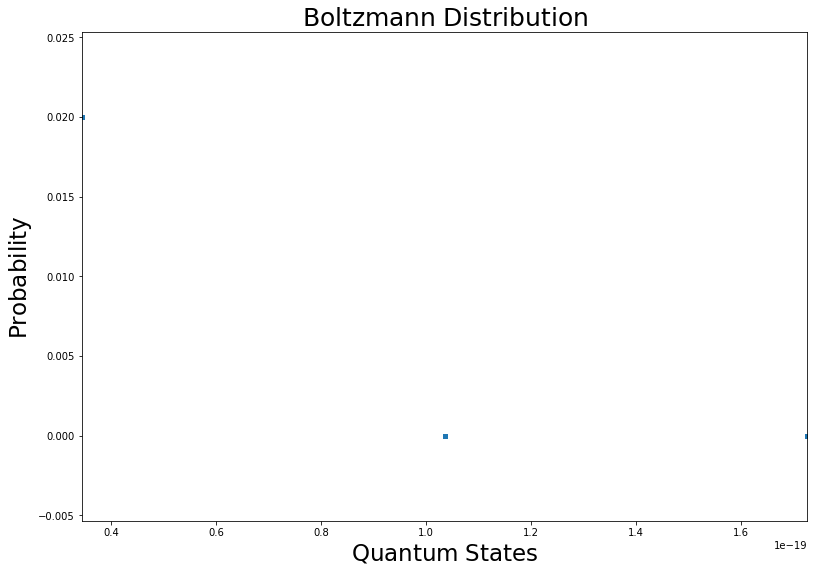

None


In [95]:
print(boltzmann2(300))